# Predicting breast cancer using machine learning

This notebook looks into various Python-based machine learning and datascience and data science libraries in an attemp to build a machine learning model and capable of predicting whether the breast tumor is malignant or benign based on the attributes of the tumor.

The following approach will be used:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation...

## 1. Problem definition

In a statement,
> Given the attributes of the tumor, can we predict whether the tumor is malignant or benign?

## 2. Data

The original data came from the Wisconsin Breast Cancer Database from the UCI Machine Learning Repository ~ https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

Another version can be found in kaggle.com ~ https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 3. Evaluation

>If we can reach 95% accuracy at predicting malignant or benign tumors during the proof of concept, then the project can be pursued.

## 4. Features

**This is the data dictionary**

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)


## Preparing the tools

Using pandas, matplotlib and numpy for data analysis and manipulation

In [1]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models handling categorical data
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

# Models for feature scaling
from sklearn.preprocessing import StandardScaler

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("Breast cancer data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## EDA - exploratory data analysis

Done to find more about the data and become a subject matter expert on the dataset

1. what questions are we trying to solve?
2. what kind of data do we have and how do we different different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should we care about them?
5. how can you add, change or remove features to get more out of our data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# checking for missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

the dataset has no missing values

In [6]:
# dropping unnecessary columns
df.drop("Unnamed: 32", axis=1, inplace=True)

In [7]:
df.drop("id", axis=1, inplace=True)

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# finding how many of each class there are
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

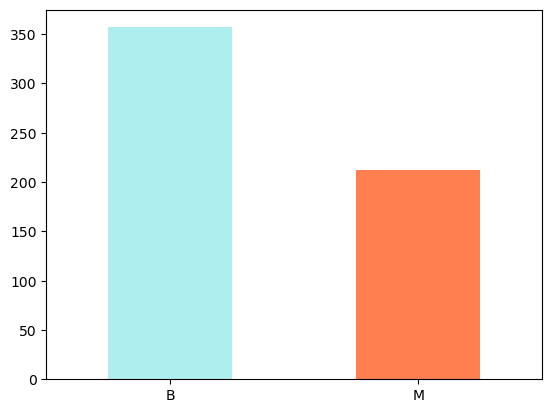

In [10]:
df["diagnosis"].value_counts().plot(kind="bar", color=["paleturquoise","coral"]);
plt.xticks(rotation=0);

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Radius worst vs texture worst for breast cancer

In [12]:
df.radius_worst.value_counts(), df.texture_worst.value_counts()

(12.360    5
 13.340    4
 13.500    4
 12.840    3
 15.140    3
          ..
 15.740    1
 11.870    1
 17.800    1
 12.370    1
 9.456     1
 Name: radius_worst, Length: 457, dtype: int64,
 27.26    3
 17.70    3
 16.93    2
 30.50    2
 23.17    2
         ..
 32.06    1
 24.70    1
 22.00    1
 39.34    1
 30.37    1
 Name: texture_worst, Length: 511, dtype: int64)

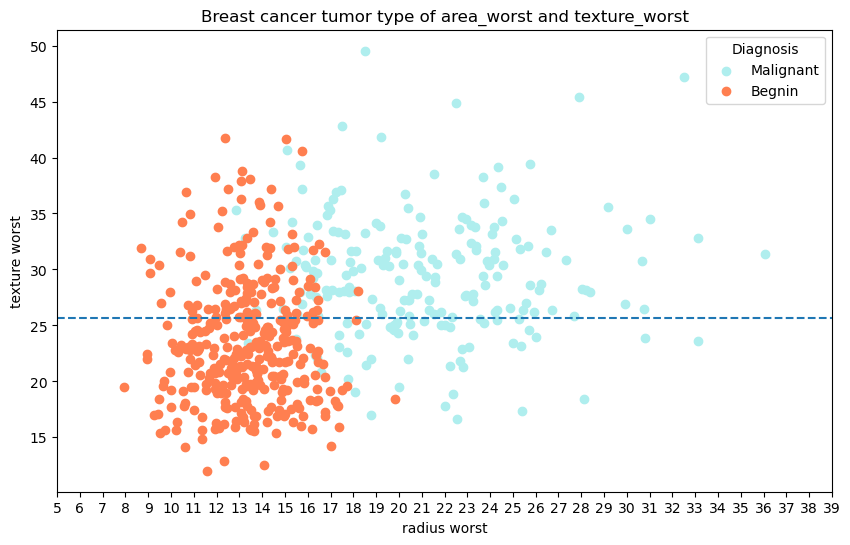

In [13]:
# visualize the radius worst using scatter plot
plt.figure(figsize=(10, 6))

# scatter with malignant examples
plt.scatter(df.radius_worst[df.diagnosis=="M"],
           df.texture_worst[df.diagnosis=="M"],
           c="paleturquoise");

# scatter with begnin examples
plt.scatter(df.radius_worst[df.diagnosis=="B"],
           df.texture_worst[df.diagnosis=="B"],
           c="coral");

# helpful info
plt.title("Breast cancer tumor type of area_worst and texture_worst")
plt.xticks(np.arange(5, 40, 1))
plt.xlabel("radius worst")
plt.ylabel("texture worst")
plt.legend(["Malignant", "Begnin"], title="Diagnosis");

# add horizontal line
plt.axhline(df["texture_worst"].mean(),
           linestyle="--");

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since we have the 'diagnosis' column in categories we have to convert it into numerical form using `LabelEncoder`

In [15]:
# getting the categorical features
categorical_feature = ["diagnosis"]

# encoding the features
encoder = LabelEncoder()

for column in categorical_feature:
    df[column] = encoder.fit_transform(df[column])

In [16]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We have converted the categorical features into numerical, we can now make a correlation matrix 

In [17]:
# Making a correlation matrix
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [18]:
sns.choose_light_palette("husl")

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

[(0.928400678190116, 0.9478103788759907, 0.944453036504835),
 (0.8628220913788363, 0.8970612077691371, 0.8916872171349329),
 (0.7972435045675565, 0.8463120366622834, 0.8389213977650309),
 (0.7293228253701598, 0.7937503951587563, 0.7842710848462038),
 (0.6637442385588801, 0.7430012240519027, 0.7315052654763018),
 (0.5958235593614833, 0.6904395825483758, 0.6768549525574746),
 (0.5302449725502036, 0.639690411441522, 0.6240891331875726),
 (0.46232429335280684, 0.587128769937995, 0.5694388202687455),
 (0.3967457065415272, 0.5363795988311414, 0.5166730008988434),
 (0.33116711973024743, 0.4856304277242877, 0.46390718152894134)]

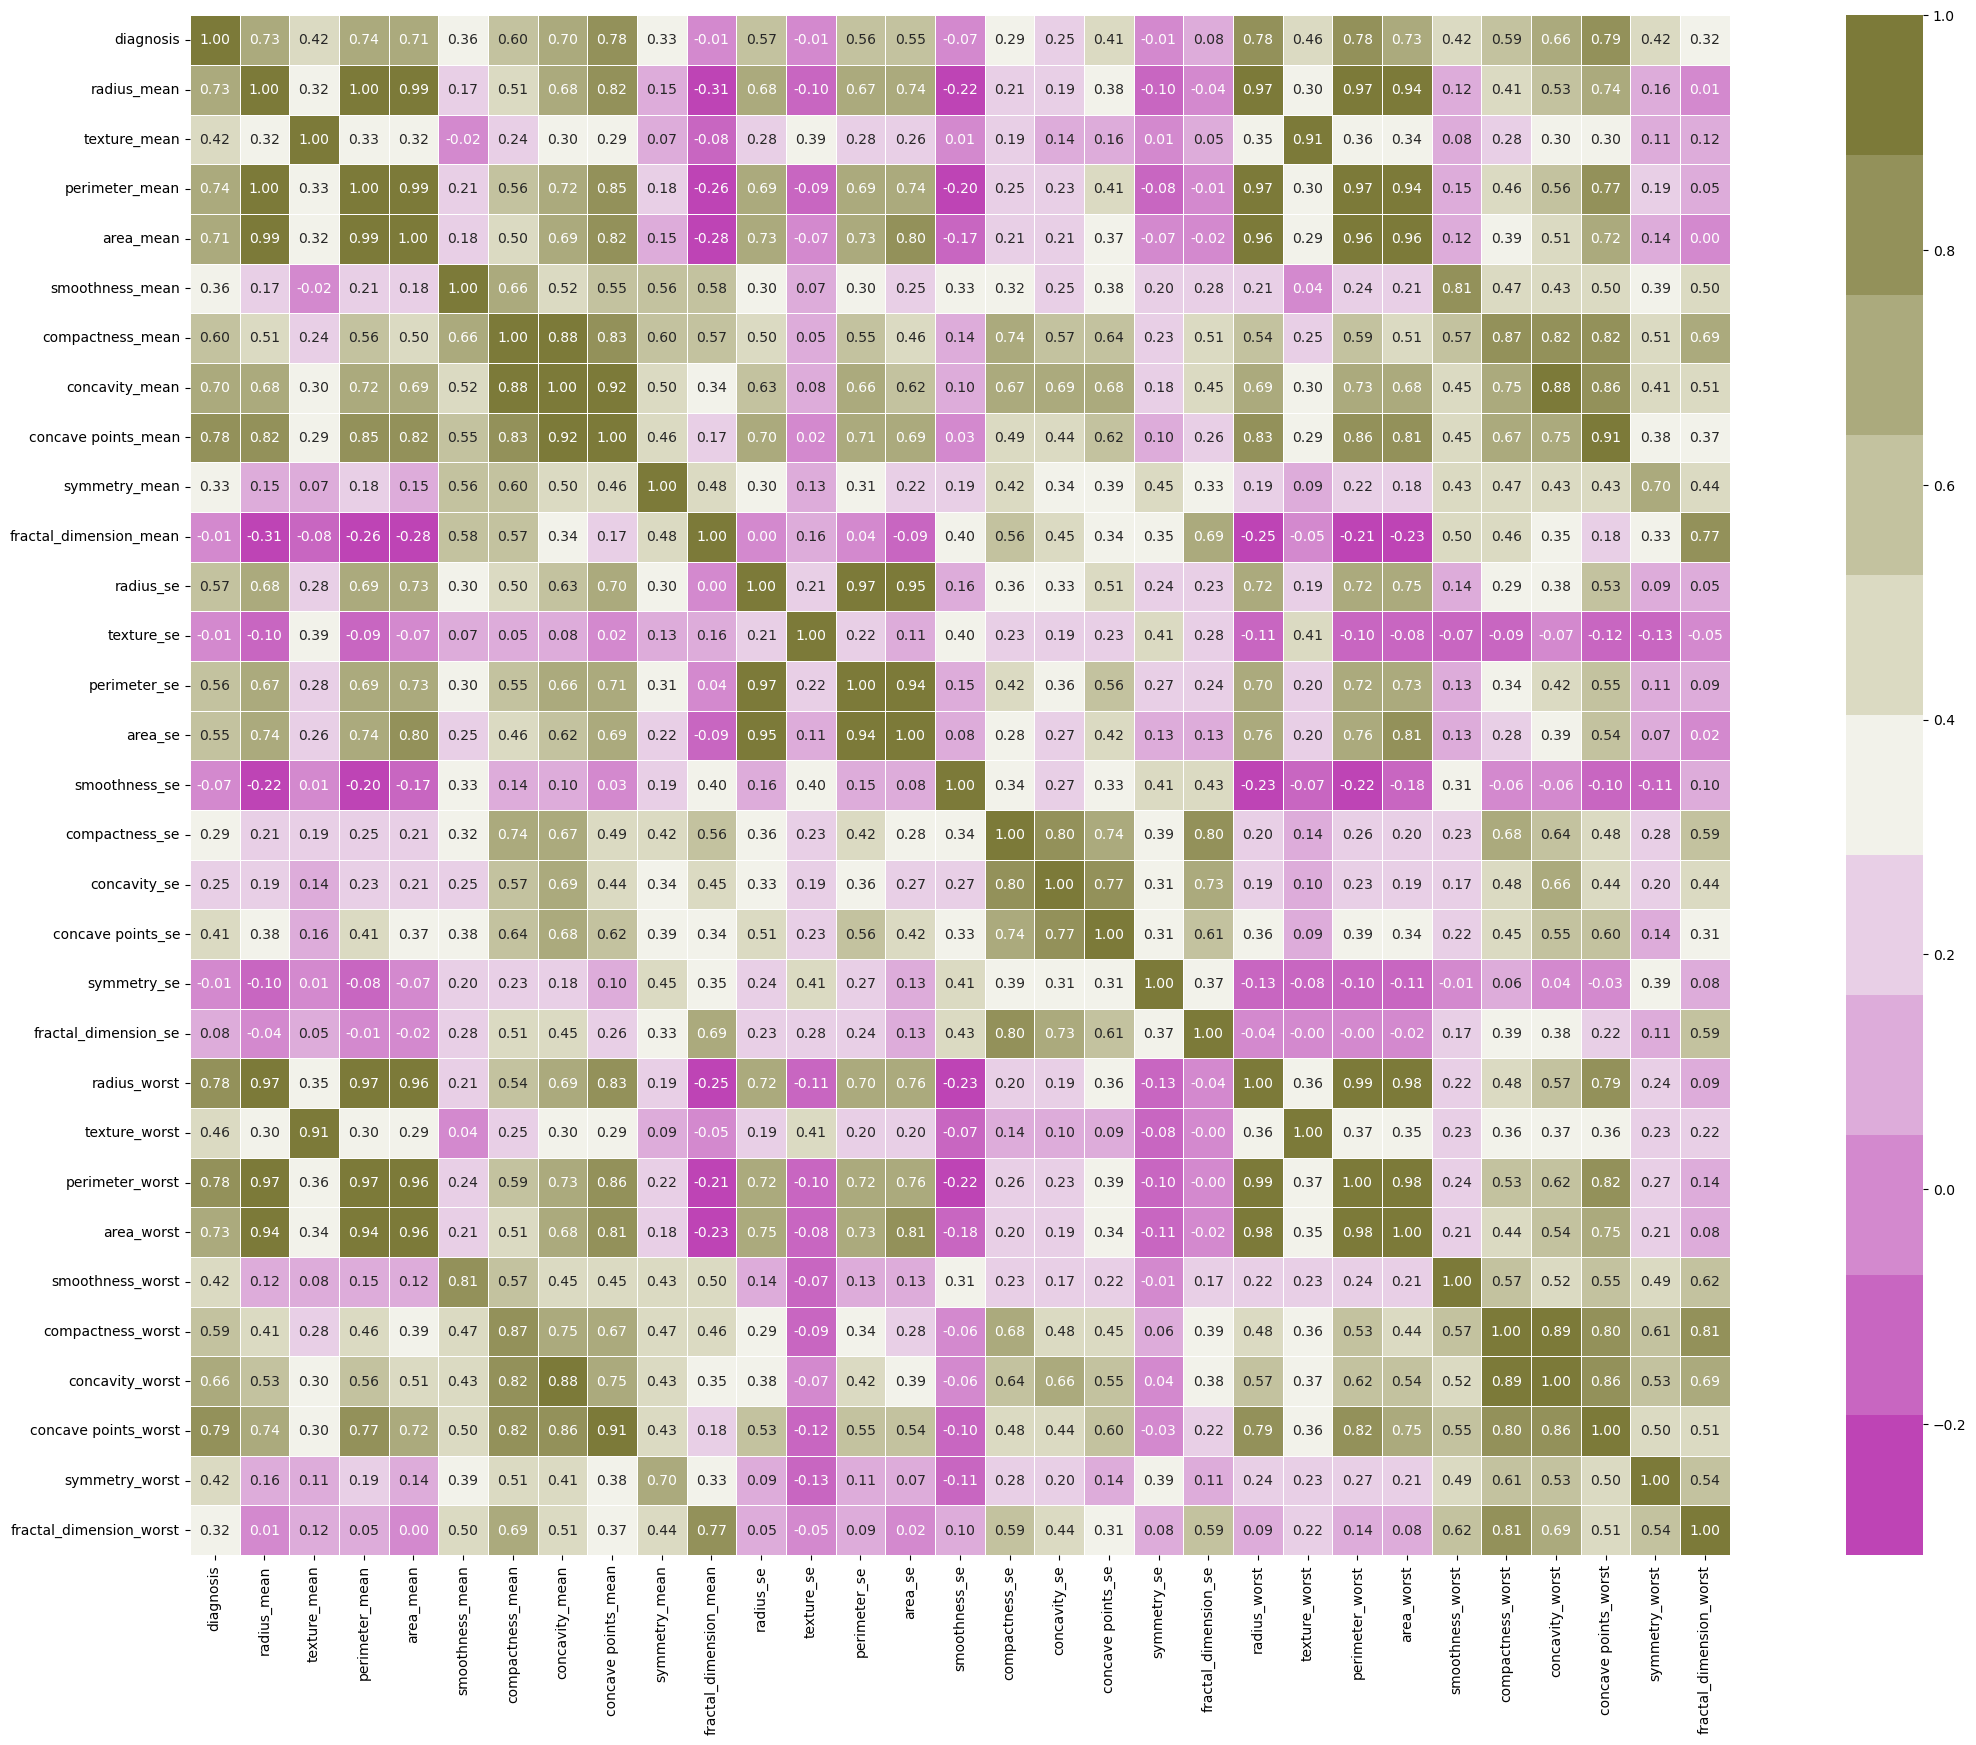

In [19]:
# Visualizing the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap=sns.diverging_palette(312, 84, n=11),
                 square=True)

## Modelling

In [20]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# splitting the data into training and testing sets....diagnosis is our target column

# set random seed
np.random.seed(42)

# split data into X & y
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

## Feature scaling

We can standardize our features to the same scale for the training dataset only to prevent test dataset information from leaking into the training process

In [22]:
# standardization of the features using StandardScaler

# create an instance of standard scaler
scaler = StandardScaler()

# standardize the training dataset
X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train),
                                   index=X_train.index,
                                   columns=X_train.columns)

# standardize the testing data
X_test_transformed = pd.DataFrame(scaler.transform(X_test),
                                  index=X_test.index,
                                  columns=X_test.columns)

# after standardization
X_train_transformed.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.162306e-16,-3.513673e-17,-1.132183e-16,3.669836e-16,-2.381489e-16,-4.294489e-17,-5.953723e-17,2.225326e-16,1.444510e-16,5.055785e-16,...,-7.027346e-17,-6.754060e-16,-2.928061e-17,1.815398e-16,-1.561632e-17,-2.249727e-16,-7.612958e-17,-8.198570e-17,5.153387e-16,2.147245e-17
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.819583e+00,-2.223500e+00,-1.809497e+00,-1.365036e+00,-3.100011e+00,-1.607228e+00,-1.119899e+00,-1.269910e+00,-2.345430e+00,-1.776889e+00,...,-1.572438e+00,-2.230887e+00,-1.578174e+00,-1.152259e+00,-2.617938e+00,-1.455995e+00,-1.312795e+00,-1.749805e+00,-2.124261e+00,-1.616973e+00
25%,-6.830930e-01,-7.075360e-01,-6.907613e-01,-6.602049e-01,-7.132037e-01,-7.770872e-01,-7.505387e-01,-7.349048e-01,-7.010461e-01,-7.097920e-01,...,-6.616975e-01,-7.412292e-01,-6.853483e-01,-6.358132e-01,-7.430298e-01,-6.961323e-01,-7.555873e-01,-7.700987e-01,-6.499846e-01,-7.189616e-01
50%,-2.314983e-01,-1.185158e-01,-2.429378e-01,-2.895973e-01,-8.082013e-02,-2.413402e-01,-3.446456e-01,-3.911235e-01,-6.915087e-02,-1.772851e-01,...,-2.632354e-01,-5.210786e-02,-2.829543e-01,-3.357508e-01,-2.741590e-02,-2.753858e-01,-2.304110e-01,-2.386392e-01,-1.236838e-01,-2.135847e-01
75%,4.593426e-01,5.631988e-01,4.884799e-01,3.193386e-01,6.331729e-01,5.281282e-01,5.473870e-01,6.737569e-01,5.354290e-01,4.642225e-01,...,4.525400e-01,6.857059e-01,5.263332e-01,2.724862e-01,6.296478e-01,5.738568e-01,5.383496e-01,7.189995e-01,4.319440e-01,4.600643e-01
max,3.961679e+00,4.715674e+00,3.976811e+00,5.208312e+00,4.864642e+00,3.964311e+00,4.256736e+00,4.022271e+00,4.476124e+00,4.815921e+00,...,4.120889e+00,3.962127e+00,4.322305e+00,5.955420e+00,3.767506e+00,4.424833e+00,4.672828e+00,2.709674e+00,5.917679e+00,4.999482e+00


After splitting and scaling our data we can build our machine learning model

we will test 4 machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier
4. SVC

In [23]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "SVC": SVC()}

# create a function to fit and score models
def fit_and_score(models, X_train_transformed, X_test_transformed, y_train, y_test):
    """
    fitting and evaluating machine learning models.
    models: a dictionary of different machine learning models
    X_train: training data with no labels
    X_test: testing data with no labels
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    model_scores = {} 
    for name, model in models.items():
        model.fit(X_train_transformed, y_train)
        model_scores[name] = model.score(X_test_transformed, y_test) 
    
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,
                            X_train_transformed=X_train_transformed,
                            X_test_transformed=X_test_transformed,
                            y_train=y_train,
                            y_test=y_test)

model_scores

{'Logistic Regression': 0.9736842105263158,
 'KNN': 0.9473684210526315,
 'Random Forest': 0.9649122807017544,
 'SVC': 0.9824561403508771}

SVC performs best with an accuracy of 98%

## Model Comparison

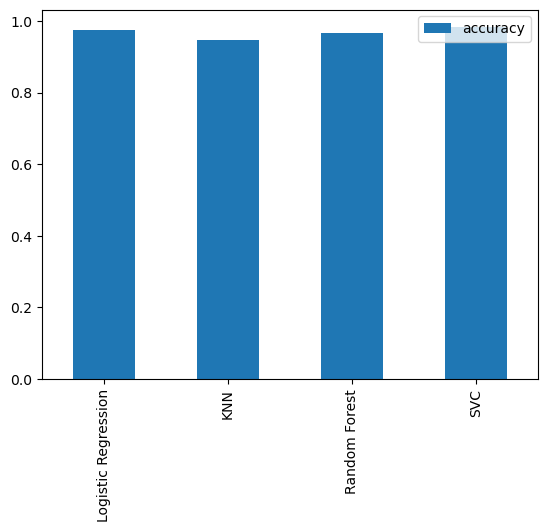

In [25]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();         

We have our baseline model, our next steps will be:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification
* ROC curve
* AUC

## Hyperparameter tuning (by hand)

In [26]:
# tuning KNN

knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [27]:
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1, 21)

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train_transformed, y_train)
    train_scores.append(knn.score(X_train_transformed, y_train))
    test_scores.append(knn.score(X_test_transformed, y_test))

In [28]:
train_scores

[1.0,
 0.9714285714285714,
 0.9846153846153847,
 0.967032967032967,
 0.9802197802197802,
 0.9692307692307692,
 0.9692307692307692,
 0.967032967032967,
 0.978021978021978,
 0.9714285714285714,
 0.9758241758241758,
 0.9692307692307692,
 0.9736263736263736,
 0.9626373626373627,
 0.967032967032967,
 0.9604395604395605,
 0.967032967032967,
 0.9604395604395605,
 0.9626373626373627,
 0.9582417582417583]

In [29]:
test_scores

[0.9385964912280702,
 0.9473684210526315,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9473684210526315,
 0.956140350877193,
 0.9649122807017544,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.956140350877193,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

Maximum KNN score on test data: 96.49%


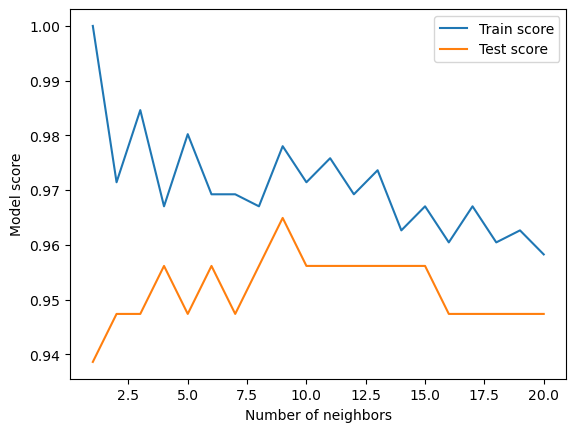

In [30]:
# visualize the train and test score for the knn classifier after tuning hyperparameters
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

After tuning KNearest Neigbours by hand the performance improves 96.49% accuracy

In [31]:
model_scores

{'Logistic Regression': 0.9736842105263158,
 'KNN': 0.9473684210526315,
 'Random Forest': 0.9649122807017544,
 'SVC': 0.9824561403508771}

## Hyperparameter tuning using RandomizedSearchCV

we'll tune all the 4 models:
* Logistic regression
* Random forest classifier
* SVC

In [32]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
# Create a hyperparameter grid for SVC
SVC_grid = {"C": np.logspace(-10, 10, 21),
           "kernel": ["rbf", "poly"],
           "gamma": np.logspace(-10, 10, 21).tolist()+["scale", "auto"]}

# Create a hyperparameter grid for knn
knn_grid = {'weights': ["uniform", "distance"],
           'metric': ["minkowski", "euclidean", 'manhattan']}

# Create a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-10, 10, 21),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split":np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Hyperparameter grids have been setup for each of our models, we can tune them using `RandomizedSearchCV`

In [34]:
# tuning SVC()

np.random.seed(42)

# setup random hyperparameter search for SVC()
rs_svc = RandomizedSearchCV(SVC(),
                           param_distributions=SVC_grid,
                           n_iter=20,
                           scoring="accuracy",
                           n_jobs=-1,
                           cv=5,
                           verbose=True)

# fit random hyperparameter search model for SVC()
rs_svc.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                                        'gamma': [1e-10, 1e-09, 1e-08, 1e-07,
                                                  1e-06, 1e-05, 0.0001, 0.001,
                                                  0.01, 0.1, 1.0, 10.0, 100.0,
                                                  1000.0, 10000.0, 100000.0,
                                                  1000000.0, 10000000.0,
                                                  100000000.0, 1000000000.0,
                                                  10000000000.0, 'scale',
                                                  'auto'],
                                        'kernel': ['rbf', 'poly']},
                   scoring='accuracy', verbose=True)

In [35]:
rs_svc.best_params_

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 10000.0}

In [36]:
rs_svc.score(X_test_transformed, y_test)

0.9649122807017544

`SVC()` gives a lower accuracy when hyperparameters are tuned using `RandomizedSearchCV`

Doing the same for the rest of the models

In [37]:
# LogisticRegression

# set up random seed
np.random.seed(42)

# set up random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1}

In [39]:
# RandomForestClassifier

# setup random seed
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_rf.score(X_test_transformed, y_test)

0.9649122807017544

In [41]:
# KNN classifier

# setup random seed
np.random.seed(42)

# setup random hyperparameter search for KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                           param_distributions=knn_grid,
                           cv=5,
                           n_iter=20,
                           n_jobs=-1,
                           verbose=True)

# fit random hyperparameter search model for knn
rs_knn.fit(X_train_transformed, y_train)

c:\Users\USER\desktop\ztm\first_project\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [42]:
rs_knn.score(X_test_transformed, y_test)

0.9649122807017544

In [43]:
model_scores

{'Logistic Regression': 0.9736842105263158,
 'KNN': 0.9473684210526315,
 'Random Forest': 0.9649122807017544,
 'SVC': 0.9824561403508771}

## Hyperparameter tuning with GridSearchCV

Since no model has shown improvements using `RandomizedSearchCV`, we can try and improve our highest performing model using `GridSearchCV`


In [44]:
# setup random seed
np.random.seed(42)

# Using different grid hyperparameters for svc
SVC_grid_gs = {"C": [0.1, 1, 10, 100, 1000],
            "kernel": ["rbf", "poly"],
            "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}


gs_svc = GridSearchCV(SVC(),
                     param_grid=SVC_grid_gs,
                     scoring="accuracy",
                     refit="accuracy",
                     n_jobs=-1,
                     cv=5,
                     verbose=True)

gs_svc.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring='accuracy', verbose=True)

In [45]:
gs_svc.score(X_test_transformed, y_test)

0.9736842105263158

In [46]:
gs_svc.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [47]:
# check LogisticRegression parameters
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
# trying out GridSearchCV on LogisticRegression
np.random.seed(42)
# Using different grid hyperameters for LogisticRegression()
gs_log_reg_grid = {"C": np.logspace(-10, 10, 31),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=gs_log_reg_grid,
                          scoring="accuracy",
                          refit="accuracy",
                          n_jobs=-1,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-10, 4.64158883e-10, 2.15443469e-09, 1.00000000e-08,
       4.64158883e-08, 2.15443469e-07, 1.00000000e-06, 4.64158883e-06,
       2.15443469e-05, 1.00000000e-04, 4.64158883e-04, 2.15443469e-03,
       1.00000000e-02, 4.64158883e-02, 2.15443469e-01, 1.00000000e+00,
       4.64158883e+00, 2.15443469e+01, 1.00000000e+02, 4.64158883e+02,
       2.15443469e+03, 1.00000000e+04, 4.64158883e+04, 2.15443469e+05,
       1.00000000e+06, 4.64158883e+06, 2.15443469e+07, 1.00000000e+08,
       4.64158883e+08, 2.15443469e+09, 1.00000000e+10]),
                         'solver': ['liblinear']},
             refit='accuracy', scoring='accuracy', verbose=True)

In [49]:
gs_log_reg.score(X_test_transformed, y_test)

0.9912280701754386

In [50]:
gs_log_reg.best_params_

{'C': 0.21544346900318778, 'solver': 'liblinear'}

In [51]:
# # Trying out GridSearchCV on RandomForestClassifier

# np.random.seed(42)

# # using different grid parameters
# gs_rf_grid = {"n_estimators": np.arange(10, 1000, 50),
#             "max_depth": [None, 3, 5, 10],
#             "min_samples_split":np.arange(2, 20, 2),
#             "min_samples_leaf": np.arange(1, 20, 2)}

# gs_rf = GridSearchCV(RandomForestClassifier(),
#                      param_grid=gs_rf_grid,
#                      scoring="accuracy",
#                      refit="accuracy",
#                      n_jobs=-1,
#                      cv=5,
#                      verbose=True)

# gs_rf.fit(X_train_transformed, y_train)

When using `GridSearchCV` it gives a higher performance with `LogisticRegression` model compared to `RandomizedSearchCV`

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

making predictions

In [52]:
# making predictions with tuned model
y_preds = gs_log_reg.predict(X_test_transformed)

In [53]:
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [54]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int32

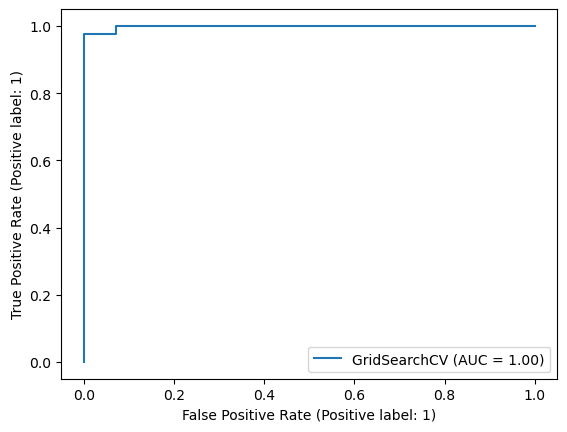

In [55]:
# plot ROC curve and evaluate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test_transformed, y_test);

In [56]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[71  0]
 [ 1 42]]


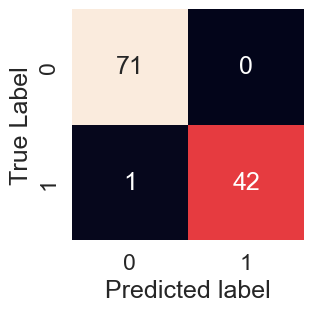

In [57]:
# Visualize confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label")
    
plot_conf_mat(y_test, y_preds)

A `Classification Report`

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Calculate evaluation metrics using cross-validation

we'll calculate accuracy, precision, recall and F1-score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [59]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.21544346900318778, 'solver': 'liblinear'}

In [60]:
# create a new classifier with the best parameters
clf = LogisticRegression(C=0.21544346900318778,
          solver="liblinear")

In [61]:
# Cross-validated accuracy, precision, recall, f1-score
cv_metrics = {"accuracy": "accuracy", "precision": "precision", "recall": "recall", "f1": "f1"}

def cross_val_scores(cv_metrics):
    metric_evaluation = {}
    
    for name, cv_metric in cv_metrics.items():
        metric_evaluation[name] = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           cv=10,
                                           scoring=cv_metric))
     
    return metric_evaluation


In [62]:
metric_evaluation = cross_val_scores(cv_metrics=cv_metrics)
metric_evaluation


{'accuracy': 0.9437969924812029,
 'precision': 0.9433850931677018,
 'recall': 0.9064935064935066,
 'f1': 0.9229201692616325}

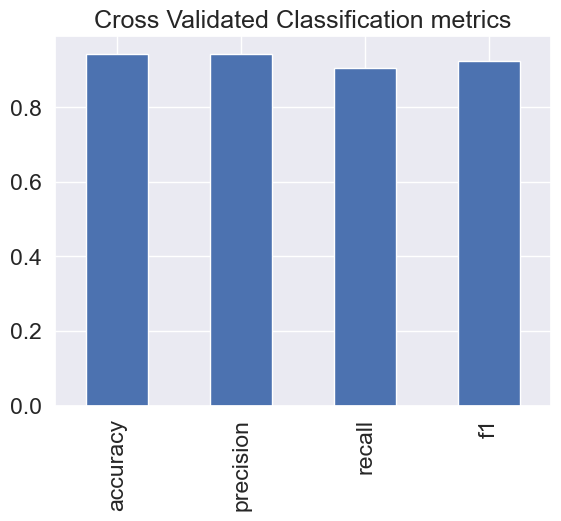

In [63]:
# Visualizing our cross_validation_metrics
cv_df = pd.DataFrame(metric_evaluation, index=[0])
cv_df.T.plot.bar(title="Cross Validated Classification metrics",
                 legend=False);

## Feature importance

Which features contributed most to the outcomes of our model?

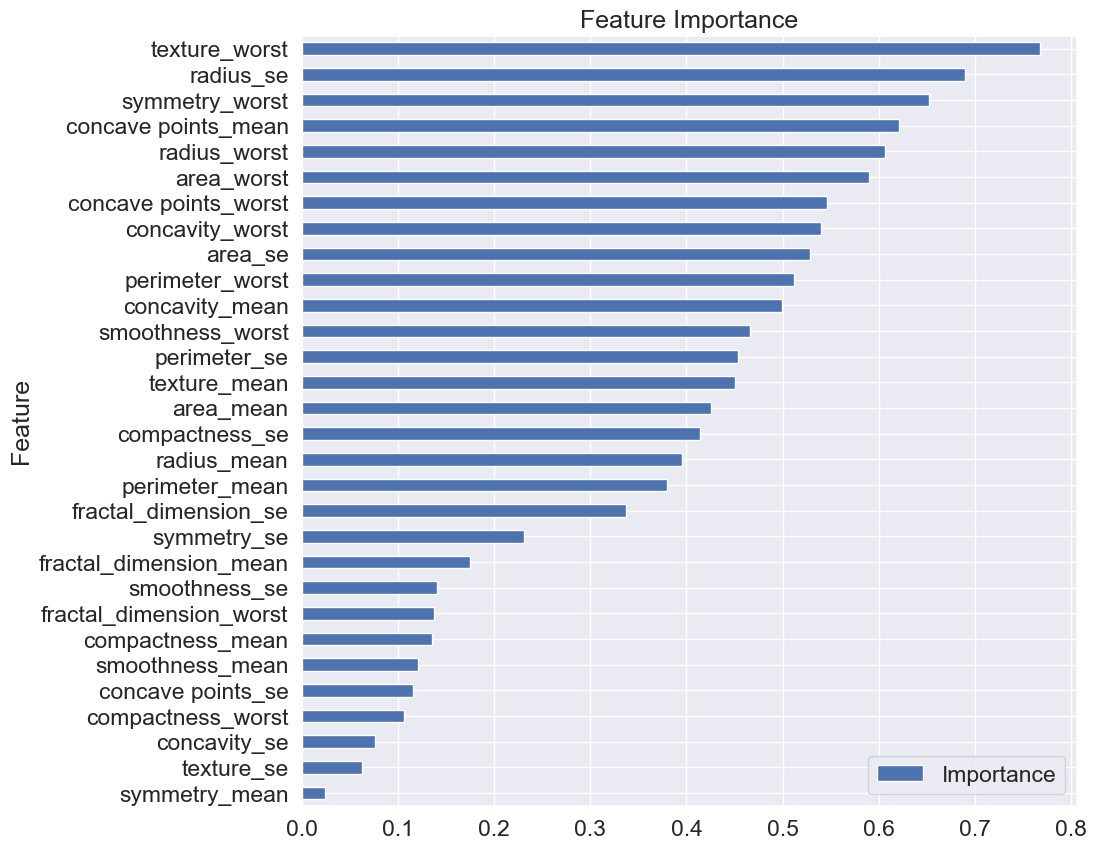

In [67]:
# using our logistic regression model to find feature importance and its best hyperparameters
clf = LogisticRegression(C=0.21544346900318778,
                         solver="liblinear")

clf.fit(X_train_transformed, y_train)

coefficients = clf.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": avg_importance})
feature_importance = feature_importance.sort_values("Importance", ascending=True)

# Visualize the feature importance
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 10), title="Feature Importance");